In [4]:
from transmission_line_simulator import *
import scipy.constants

#  Create a curcuit


In [5]:
resonator_claw_ground = capacitor()
resonator_claw_qubit = capacitor()
GND = short()
GND1 = short()
GND2 = short()
GND3 = short()
GND4 = short()
GND5 = short()

feedline_cap = capacitor()
purcell_cap = capacitor()
qubit_cap = capacitor()
qubit_inductor = inductor()
#L = inductor()
source = port()
#source_feedline = transmission_line()
analyzer_feedline = transmission_line_coupler(n=1)
# analyzer = port()


resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)#
feedline_coupler = transmission_line_coupler()
purcell_coupler = transmission_line_coupler()
purcell_short_end_before_coupler = transmission_line_coupler(n=1)
purcell_claw_end = transmission_line_coupler(n=1)#

circuit = transmission_line_system()
circuit.add_element(source, [1])
circuit.add_element(feedline_coupler, [1, 2, 3, 4])
circuit.add_element(analyzer_feedline, [3, 5])
circuit.add_element(feedline_cap, [5, 12])

circuit.add_element(purcell_claw_end, [2, 6])
circuit.add_element(purcell_cap, [6, 13])
circuit.add_element(purcell_short_end_before_coupler, [4, 7])
circuit.add_element(purcell_coupler, [7, 8,14,15])
# circuit.add_element(GND, [9])
# circuit.add_element(GND, [10])
circuit.add_element(resonator_short_end, [8,9])

circuit.add_element(resonator_claw_end, [9,10])
circuit.add_element(resonator_claw_ground, [10,16])
circuit.add_element(resonator_claw_qubit, [10,11])
circuit.add_element(qubit_cap, [11, 0])
circuit.add_element(qubit_inductor, [11, 0])
circuit.add_element(GND, [0])
circuit.add_element(GND1, [12])
circuit.add_element(GND2, [13])
circuit.add_element(GND3, [14])
circuit.add_element(GND4, [15])
circuit.add_element(GND5, [16])

In [6]:
source.Z0=50

feedline_coupler.l=0.4e-3
feedline_coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
feedline_coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
feedline_coupler.Rl=np.zeros(feedline_coupler.Ll.shape, dtype=np.int)
feedline_coupler.Gl=np.zeros(feedline_coupler.Ll.shape, dtype=np.int)

analyzer_feedline.l = 1e-3
analyzer_feedline.Cl = 176.494e-12
analyzer_feedline.Ll = 401.892e-9
analyzer_feedline.Rl = 0
analyzer_feedline.Gl = 0

feedline_cap.C=10e-15

purcell_claw_end.l = 1e-3
purcell_claw_end.Cl = 176.494e-12
purcell_claw_end.Ll = 401.892e-9
purcell_claw_end.Rl = 0
purcell_claw_end.Gl = 0

purcell_cap.C=10e-15

purcell_short_end_before_coupler.l = 3.6e-3
purcell_short_end_before_coupler.Cl = 176.494e-12
purcell_short_end_before_coupler.Ll = 401.892e-9
purcell_short_end_before_coupler.Rl = 0
purcell_short_end_before_coupler.Gl = 0

purcell_coupler.l=20e-6
purcell_coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
purcell_coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
purcell_coupler.Rl=np.zeros(purcell_coupler.Ll.shape, dtype=np.int)
purcell_coupler.Gl=np.zeros(purcell_coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 4e-3
resonator_short_end.Cl = 176.494e-12
resonator_short_end.Ll = 401.892e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1e-3
resonator_claw_end.Cl = 176.494e-12
resonator_claw_end.Ll = 401.892e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

resonator_claw_ground.C=10e-15
resonator_claw_qubit.C=10e-15
qubit_cap.C=70e-15
qubit_inductor.L=19e-9

# Simulate scattering parameter S21


In [7]:
nop = 5000
frequency = np.linspace(5.8e9+0j, 6.25e9+0j, nop)
y = np.zeros(nop, dtype=complex)

In [8]:
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)
matrix_of_curcuit.shape

(73, 73)

In [9]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=-1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
abs_S21 = np.abs(y)

In [10]:
#np.argmax(abs_S21)
#norm_abs_S21 = abs_S21[np.argmax(abs_S21)]
s21_new =  abs_S21#/(np.max( abs_S21))

In [11]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(frequency.real, s21_new, label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.show()


<Figure size 640x480 with 1 Axes>

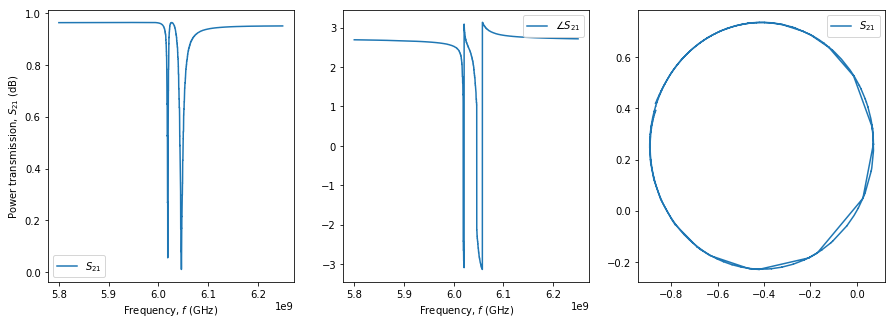

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(frequency.real, s21_new, label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.subplot(132)
plt.plot(frequency.real, np.angle(y), label = '$\\angle S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.legend()
plt.subplot(133)
plt.plot(y.real, y.imag, label = '$S_{21}$')
plt.legend()
plt.show()

In [51]:
# import resonator_tools
# from resonator_tools.circuit import notch_port, reflection_port

In [52]:
# fitter = notch_port(f_data=frequency.real, z_data_raw=y)

In [53]:
# fitter.autofit()

In [54]:
# fitter.plotall()

# Fitting S21

In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import scipy.io
import lmfit
# import pprint
# import os

In [56]:
f = frequency.real
s = y

In [63]:
def fit_and_plot_abs(freq, s21, plotfit=True, plotguess=True, label=None, plot_filename=True, **guessvals):
    def s21func(x, A, phi, kP, gR, wR, wP, J, k): 
        y = (A + k*(x-np.mean(x)))*np.abs(np.cos(phi) - np.exp(1j*phi)*kP*(gR-2j*(x-wR))/(4*J*J+(kP-2j*(x-wP))*(gR-2j*(x-wR))))
        return y
    model = lmfit.Model(s21func)
    def_guessvals = dict(
        A=0.5,
        phi=-0.6,
        kP=50.8,
        gR=0.5,
        wR=np.mean(freq),
        wP=np.mean(freq),
        J=12,
        k=0,
    )
    def_guessvals.update(guessvals)
    pars = model.make_params(**def_guessvals)
    pars['kP'].min = 0
    pars['gR'].min = 0
    pars['J'].min = 0
    pars['wP'].min = freq.min()
    pars['wR'].min = freq.min()
    pars['wP'].max = freq.max()
    pars['wR'].max = freq.max()
    fit = model.fit(np.abs(s21), x=freq, params=pars)
    s21fit = fit.best_fit
    s21guess = s21func(freq, **def_guessvals)
    
    plt.plot(freq, np.abs(s21),'blue',  linewidth=1.2, label=label)
    if plotfit: plt.plot(freq,s21fit, 'r--',linewidth=0.8, label='Fit')
    if plotguess: plt.plot(freq, s21guess,'k--',  linewidth=2, label='Simulation')
    plt.xlabel('Frequency, $f$ [MHz]')
    plt.ylabel('Normalized transmission\n amplitude, $|S_{21}|/ \\mathrm{max}(|S_{21}|)$')
    if label is not None: plt.legend()
    plt.gcf().set_size_inches(4.5*2,3*2)
    if plot_filename is not None: plt.savefig(plot_filename+'.png', bbox_inches='tight')
    plt.show()

    
    return fit, s21fit

In [64]:
datatransform = lambda f, s: (f/1e6, s/np.abs(s).max())

In [75]:
my_params = {
'figure.dpi':  120,
'figure.figsize': [32,16],
'figure.subplot.left' : 0.15,
'figure.subplot.right'      : 0.9,
'figure.subplot.bottom'     : 0.12,
'axes.titlesize'    : 'medium',
'axes.labelsize'    : 10.0 ,
'xtick.direction' : 'in',
'ytick.direction' : 'in',
'ytick.labelsize'   :'small',
'xtick.labelsize'   :'small',
'legend.fontsize'   : 8,  #small,
'legend.loc'        : 'best',
'font.size'         : 10.0,
'font.family'       : 'serif',
'text.usetex' : False,    # if you have latex
}

guessvals = {'A': 1,
            'J': 25,
            'gR': 1,
            'k': 0.1,
            'kP': 50,
            'phi': 25,
            'wP': 6000,
            'wR': 6050}

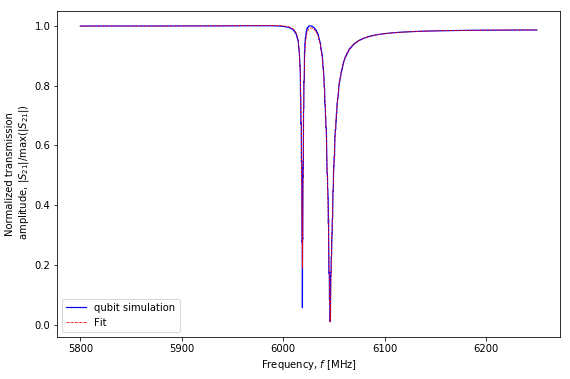

{'A': 1.0002971286237685,
 'J': 10.247890710079712,
 'gR': 0.5838217334521596,
 'k': -1.32098296009024e-05,
 'kP': 12.422168105191679,
 'phi': 25.011193129674957,
 'wP': 6040.910780697981,
 'wR': 6023.4881397729505}


In [85]:
fit, s21fit = fit_and_plot_abs(*datatransform(f,s), **guessvals, plotguess=False,label='qubit simulation', plot_filename='purcell and resonator')
pprint.pprint(fit.best_values)

In [83]:
fit